In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

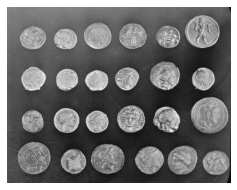

In [4]:
img = cv2.imread('im17.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig1=plt.figure(figsize = (4,4))
plt.imshow(img, cmap='gray',vmin=0,vmax=255)
plt.axis('off');



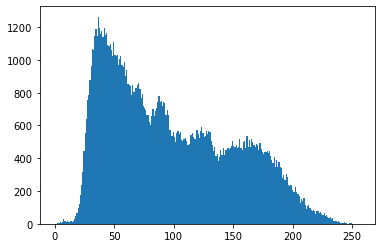

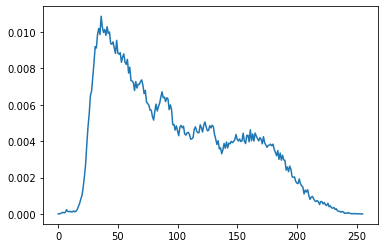

In [5]:
#Histograma
plt.hist(img.ravel(),256,[0,256])
plt.show()
hist,bins = np.histogram(img.ravel(),256,[0,256]);

#Normalizar a una pdf
hist = hist/(img.shape[0]*img.shape[1])

bins = bins[:-1]    #Eliminar el último elemento
plt.plot(bins,hist)

150


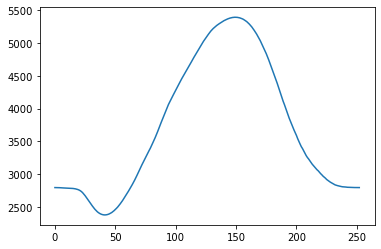

In [6]:
minSuma = 0
iMin = 0
varianzas = []
for umbral in range(1,254):
    hist1 = hist[0:umbral+1]
    hist2 = hist[umbral+1:]
    bins1 = bins[0:umbral+1]
    bins2 = bins[umbral+1:]
    #Calcular la varianza de v1 y v2 y sumarlas
    media1 = np.sum(hist1*bins1)
    media2 = np.sum(bins2*hist2)
    #También puede ser con .dot (producto punto)
    var1 = np.sum(((bins1-media1)**2)*hist1)
    var2 = np.sum(((bins2-media2)**2)*hist2)
    varSuma = var1+var2
    varianzas.append(varSuma)
    if varSuma>minSuma:
        minSuma = varSuma
        iMin = umbral

plt.plot(varianzas)
print(iMin)
    

(-0.5, 383.5, 302.5, -0.5)

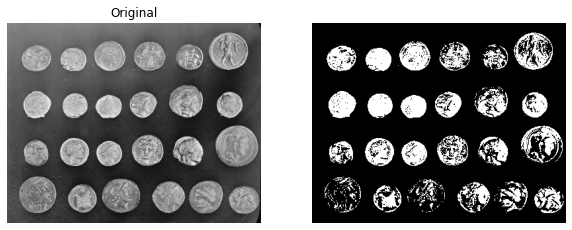

In [7]:
umbral = iMin
Iout = img.copy()
Iout[img>umbral] = 255
Iout[img<=umbral]=0

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(img, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[0].axis("off")

ax[1].imshow(Iout, cmap='gray',vmin=0,vmax=255)
ax[1].axis("off")
